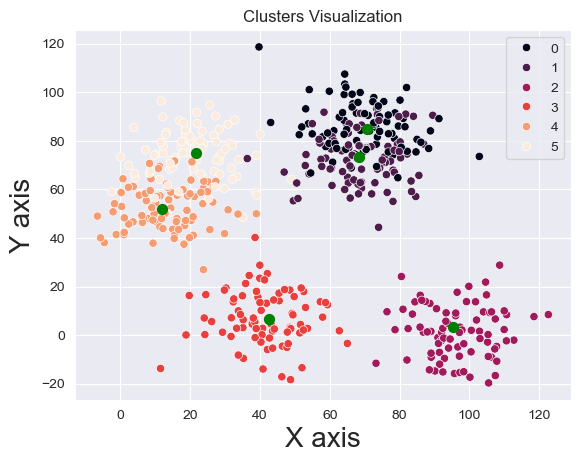

In [4]:
from mypy.memprofile import defaultdict

from mysrc.WishartClusterizationAlgorithm import Wishart
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
# import matplotlib as plt
import seaborn as sns

X, y, centers = make_blobs(n_samples=500, centers=6, n_features=2, cluster_std=10, center_box=(2, 100), shuffle=True,
                           return_centers=True, random_state=666)
X = pd.DataFrame(data=X, columns=["x", "y"])

plt.rc('axes', labelsize=20)
sns.scatterplot(data=X, x='x', y='y', hue=y, palette='rocket')
plt.scatter(centers[:, 0], centers[:, 1], s=50, c='g', marker='o')
plt.title('Clusters Visualization')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()


In [5]:

# wishart = Wishart(k=12, mu=0.01)
# x_list = X.values.tolist()
# wishart.fit(x_list)


In [6]:
from sklearn.metrics import silhouette_samples
import numpy as np

results = defaultdict(list)
#чем ближе к 1,тем лучше,[-1,1]
def Silhoette_index(values, labels):
    silhouette_vals = silhouette_samples(values, wishart.labels_)
    return np.mean(silhouette_vals)


ks = np.arange(6, 20,1)
mus = np.arange(0.05,0.5,0.05)
x, y = np.meshgrid(ks, mus)
x = np.array([x.ravel(), y.ravel()]).T
x = [(a,b) for a,b in x]
y = []
for k,mu in x:
    wishart = Wishart(k=k, mu = mu)
    x_list = X.values.tolist()
    wishart.fit(x_list)
    y.append(Silhoette_index(x_list, wishart.labels_))


z = zip(y, x)
print(sorted(z, reverse=True))
z = zip(y, x)
results["silhoette"] = sorted(z, reverse=True)
print(results["silhoette"])

[(0.4492809564510361, (16.0, 0.45)), (0.4492809564510361, (16.0, 0.4)), (0.4492809564510361, (16.0, 0.35000000000000003)), (0.4492809564510361, (16.0, 0.3)), (0.4492809564510361, (16.0, 0.25)), (0.4492809564510361, (16.0, 0.2)), (0.4492809564510361, (16.0, 0.15000000000000002)), (0.4492809564510361, (16.0, 0.1)), (0.4492809564510361, (16.0, 0.05)), (0.43469909468148166, (12.0, 0.45)), (0.43469909468148166, (12.0, 0.4)), (0.43469909468148166, (12.0, 0.35000000000000003)), (0.43469909468148166, (12.0, 0.3)), (0.43469909468148166, (12.0, 0.25)), (0.43469909468148166, (12.0, 0.2)), (0.43469909468148166, (12.0, 0.15000000000000002)), (0.43469909468148166, (12.0, 0.1)), (0.43469909468148166, (12.0, 0.05)), (0.4137468973798866, (14.0, 0.45)), (0.4137468973798866, (14.0, 0.4)), (0.4137468973798866, (14.0, 0.35000000000000003)), (0.4137468973798866, (14.0, 0.3)), (0.4137468973798866, (14.0, 0.25)), (0.4137468973798866, (14.0, 0.2)), (0.4137468973798866, (14.0, 0.15000000000000002)), (0.41374689

In [7]:
from sklearn.metrics import pairwise_distances


#чем выше тем лучше кластера разделены
def dunn_index(elements, labels):
    labels = np.array(labels)
    elements = np.array(elements)
    clusters = np.unique(labels)
    min_inter_cluster_dist = float('inf')
    max_intra_cluster_dist = float('-inf')

    for i in clusters:
        for j in clusters:
            if i != j:
                # Расстояние между центрами двух кластеров
                dist = np.min(pairwise_distances(elements[labels == i], elements[labels == j]))
                min_inter_cluster_dist = min(min_inter_cluster_dist, dist)

    for i in clusters:
        # Максимальное расстояние между объектами в одном кластере
        intra_dist = np.max(pairwise_distances(elements[labels == i]))
        max_intra_cluster_dist = max(max_intra_cluster_dist, intra_dist)

    return min_inter_cluster_dist / max_intra_cluster_dist


y = []
for k,mu in x:
    wishart = Wishart(k=k, mu = mu)
    x_list = X.values.tolist()
    wishart.fit(x_list)
    y.append(dunn_index(x_list, wishart.labels_))


z = zip(y, x)
print(sorted(z, reverse=True))
z = zip(y, x)
results["dunn_index"] = sorted(z, reverse=True)


[(0.012460418798511657, (7.0, 0.45)), (0.012460418798511657, (7.0, 0.4)), (0.012460418798511657, (7.0, 0.35000000000000003)), (0.012460418798511657, (7.0, 0.3)), (0.012460418798511657, (7.0, 0.25)), (0.012460418798511657, (7.0, 0.2)), (0.012460418798511657, (7.0, 0.15000000000000002)), (0.012460418798511657, (7.0, 0.1)), (0.012460418798511657, (7.0, 0.05)), (0.00974503161294813, (11.0, 0.45)), (0.00974503161294813, (11.0, 0.4)), (0.00974503161294813, (11.0, 0.35000000000000003)), (0.00974503161294813, (11.0, 0.3)), (0.00974503161294813, (11.0, 0.25)), (0.00974503161294813, (11.0, 0.2)), (0.00974503161294813, (11.0, 0.15000000000000002)), (0.00974503161294813, (11.0, 0.1)), (0.00974503161294813, (11.0, 0.05)), (0.00965884754115328, (16.0, 0.45)), (0.00965884754115328, (16.0, 0.4)), (0.00965884754115328, (16.0, 0.35000000000000003)), (0.00965884754115328, (16.0, 0.3)), (0.00965884754115328, (16.0, 0.25)), (0.00965884754115328, (16.0, 0.2)), (0.00965884754115328, (16.0, 0.1500000000000000

In [8]:
from sklearn.metrics import pairwise_distances


def davies_bouldin_index(elements, labels):
    labels = np.array(labels)
    elements = np.array(elements)
    clusters = np.unique(labels)
    db_index = 0
    n_clusters = len(clusters)

    # Среднее расстояние внутри кластеров
    cluster_means = [elements[labels == i].mean(axis=0) for i in clusters]
    intra_cluster_dists = [np.mean(pairwise_distances(elements[labels == i])) for i in clusters]

    for i in range(n_clusters):
        max_ratio = 0.0
        for j in range(n_clusters):
            if i != j:
                # Расстояние между центрами кластеров
                inter_cluster_dist = np.linalg.norm(cluster_means[i] - cluster_means[j])
                ratio = (intra_cluster_dists[i] + intra_cluster_dists[j]) / inter_cluster_dist
                max_ratio = max(max_ratio, ratio)
        db_index += max_ratio

    return db_index / n_clusters


y = []
for k,mu in x:
    wishart = Wishart(k=k, mu = mu)
    x_list = X.values.tolist()
    wishart.fit(x_list)
    y.append(davies_bouldin_index(x_list, wishart.labels_))


z = zip(y, x)
print(sorted(z, reverse=False))
z = zip(y, x)
results["davies_bouldin_index"] = sorted(z, reverse=False)


[(0.9775348598111904, (16.0, 0.05)), (0.9775348598111904, (16.0, 0.1)), (0.9775348598111904, (16.0, 0.15000000000000002)), (0.9775348598111904, (16.0, 0.2)), (0.9775348598111904, (16.0, 0.25)), (0.9775348598111904, (16.0, 0.3)), (0.9775348598111904, (16.0, 0.35000000000000003)), (0.9775348598111904, (16.0, 0.4)), (0.9775348598111904, (16.0, 0.45)), (0.9777076577514405, (13.0, 0.05)), (0.9777076577514405, (13.0, 0.1)), (0.9777076577514405, (13.0, 0.15000000000000002)), (0.9777076577514405, (13.0, 0.2)), (0.9777076577514405, (13.0, 0.25)), (0.9777076577514405, (13.0, 0.3)), (0.9777076577514405, (13.0, 0.35000000000000003)), (0.9777076577514405, (13.0, 0.4)), (0.9777076577514405, (13.0, 0.45)), (1.0247302497896427, (12.0, 0.05)), (1.0247302497896427, (12.0, 0.1)), (1.0247302497896427, (12.0, 0.15000000000000002)), (1.0247302497896427, (12.0, 0.2)), (1.0247302497896427, (12.0, 0.25)), (1.0247302497896427, (12.0, 0.3)), (1.0247302497896427, (12.0, 0.35000000000000003)), (1.0247302497896427,

In [9]:
def wssse(elements, labels):
    labels = np.array(labels)
    elements = np.array(elements)
    clusters = np.unique(labels)
    total_wssse = 0.0

    for i in clusters:
        cluster_points = elements[labels == i]
        center = cluster_points.mean(axis=0)
        total_wssse += np.sum((cluster_points - center) ** 2)

    return total_wssse


y = []
for k,mu in x:
    wishart = Wishart(k=k, mu = mu)
    x_list = X.values.tolist()
    wishart.fit(x_list)
    y.append(wssse(x_list, wishart.labels_))


z = zip(y, x)
print(sorted(z, reverse=False))
z = zip(y, x)
results["wssse"] = sorted(z, reverse=False)


[(88695.99878143541, (6.0, 0.05)), (88695.99878143541, (6.0, 0.1)), (88695.99878143541, (6.0, 0.15000000000000002)), (88695.99878143541, (6.0, 0.2)), (88695.99878143541, (6.0, 0.25)), (88695.99878143541, (6.0, 0.3)), (88695.99878143541, (6.0, 0.35000000000000003)), (88695.99878143541, (6.0, 0.4)), (88695.99878143541, (6.0, 0.45)), (112895.88004283205, (7.0, 0.05)), (112895.88004283205, (7.0, 0.1)), (112895.88004283205, (7.0, 0.15000000000000002)), (112895.88004283205, (7.0, 0.2)), (112895.88004283205, (7.0, 0.25)), (112895.88004283205, (7.0, 0.3)), (112895.88004283205, (7.0, 0.35000000000000003)), (112895.88004283205, (7.0, 0.4)), (112895.88004283205, (7.0, 0.45)), (150427.68267219907, (8.0, 0.05)), (150427.68267219907, (8.0, 0.1)), (150427.68267219907, (8.0, 0.15000000000000002)), (150427.68267219907, (8.0, 0.2)), (150427.68267219907, (8.0, 0.25)), (150427.68267219907, (8.0, 0.3)), (150427.68267219907, (8.0, 0.35000000000000003)), (150427.68267219907, (8.0, 0.4)), (150427.68267219907,

In [10]:
def rmsstd(elements, labels):
    labels = np.array(labels)
    elements = np.array(elements)
    unique_labels = np.unique(labels)
    rmsstd_values = []
    for label in unique_labels:
        cluster_data = elements[labels == label]

        if len(cluster_data) > 0:
            mean_value = np.mean(cluster_data)
            rms_std = np.sqrt(np.mean((cluster_data - mean_value) ** 2))
            rmsstd_values.append(rms_std)

    average_rmsstd = np.mean(rmsstd_values) if rmsstd_values else 0
    return average_rmsstd


y = []
for k,mu in x:
    wishart = Wishart(k=k, mu = mu)
    x_list = X.values.tolist()
    wishart.fit(x_list)
    y.append(rmsstd(x_list, wishart.labels_))


z = zip(y, x)
print(sorted(z, reverse=False))
z = zip(y, x)
results["rmsstd"] = sorted(z, reverse=True)


[(18.35958225732371, (6.0, 0.05)), (18.35958225732371, (6.0, 0.1)), (18.35958225732371, (6.0, 0.15000000000000002)), (18.35958225732371, (6.0, 0.2)), (18.35958225732371, (6.0, 0.25)), (18.35958225732371, (6.0, 0.3)), (18.35958225732371, (6.0, 0.35000000000000003)), (18.35958225732371, (6.0, 0.4)), (18.35958225732371, (6.0, 0.45)), (20.96001029894225, (10.0, 0.05)), (20.96001029894225, (10.0, 0.1)), (20.96001029894225, (10.0, 0.15000000000000002)), (20.96001029894225, (10.0, 0.2)), (20.96001029894225, (10.0, 0.25)), (20.96001029894225, (10.0, 0.3)), (20.96001029894225, (10.0, 0.35000000000000003)), (20.96001029894225, (10.0, 0.4)), (20.96001029894225, (10.0, 0.45)), (21.09728249495928, (9.0, 0.05)), (21.09728249495928, (9.0, 0.1)), (21.09728249495928, (9.0, 0.15000000000000002)), (21.09728249495928, (9.0, 0.2)), (21.09728249495928, (9.0, 0.25)), (21.09728249495928, (9.0, 0.3)), (21.09728249495928, (9.0, 0.35000000000000003)), (21.09728249495928, (9.0, 0.4)), (21.09728249495928, (9.0, 0.

In [11]:
def r_squared(elements, labels):
    labels = np.array(labels)
    elements = np.array(elements)
    overall_mean = np.mean(elements)
    total_variance = np.sum((elements - overall_mean) ** 2)
    clustered_variance = 0.0
    unique_labels = np.unique(labels)

    for label in unique_labels:
        cluster_data = elements[labels == label]
        if len(cluster_data) > 0:
            cluster_mean = np.mean(cluster_data)
            clustered_variance += np.sum((cluster_data - cluster_mean) ** 2)
    r2 = 1 - (total_variance - clustered_variance) / total_variance
    return r2


y = []
for k,mu in x:
    wishart = Wishart(k=k, mu = mu)
    x_list = X.values.tolist()
    wishart.fit(x_list)
    y.append(r_squared(x_list, wishart.labels_))


z = zip(y, x)
print(sorted(z, reverse=True))
z = zip(y, x)
results["r_squared"] = sorted(z, reverse=True)


[(0.7919978750844363, (18.0, 0.45)), (0.7919978750844363, (18.0, 0.4)), (0.7919978750844363, (18.0, 0.35000000000000003)), (0.7919978750844363, (18.0, 0.3)), (0.7919978750844363, (18.0, 0.25)), (0.7919978750844363, (18.0, 0.2)), (0.7919978750844363, (18.0, 0.15000000000000002)), (0.7919978750844363, (18.0, 0.1)), (0.7919978750844363, (18.0, 0.05)), (0.7779100467222007, (15.0, 0.45)), (0.7779100467222007, (15.0, 0.4)), (0.7779100467222007, (15.0, 0.35000000000000003)), (0.7779100467222007, (15.0, 0.3)), (0.7779100467222007, (15.0, 0.25)), (0.7779100467222007, (15.0, 0.2)), (0.7779100467222007, (15.0, 0.15000000000000002)), (0.7779100467222007, (15.0, 0.1)), (0.7779100467222007, (15.0, 0.05)), (0.7745922410355369, (19.0, 0.45)), (0.7745922410355369, (19.0, 0.4)), (0.7745922410355369, (19.0, 0.35000000000000003)), (0.7745922410355369, (19.0, 0.3)), (0.7745922410355369, (19.0, 0.25)), (0.7745922410355369, (19.0, 0.2)), (0.7745922410355369, (19.0, 0.15000000000000002)), (0.7745922410355369,

In [12]:
def calinski_harabasz_index(elements, labels):
    labels = np.array(labels)
    elements = np.array(elements)
    n_samples = elements.shape[0]
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    if n_clusters <= 1:
        return 0.0

    overall_mean = np.mean(elements, axis=0)

    between_cluster_dispersion = 0.0
    for label in unique_labels:
        cluster_data = elements[labels == label]
        n_i = len(cluster_data)
        if n_i > 0:
            cluster_mean = np.mean(cluster_data, axis=0)
            between_cluster_dispersion += n_i * np.sum((cluster_mean - overall_mean) ** 2)

    within_cluster_dispersion = 0.0
    for label in unique_labels:
        cluster_data = elements[labels == label]
        within_cluster_dispersion += np.sum((cluster_data - np.mean(cluster_data, axis=0)) ** 2)

    ch_index = (between_cluster_dispersion / (n_clusters - 1)) / (within_cluster_dispersion / (n_samples - n_clusters))

    return ch_index


y = []
for k,mu in x:
    wishart = Wishart(k=k, mu = mu)
    x_list = X.values.tolist()
    wishart.fit(x_list)
    y.append(calinski_harabasz_index(x_list, wishart.labels_))


z = zip(y, x)
print(sorted(z, reverse=True))
z = zip(y, x)
results["calinski-har-index"] = sorted(z, reverse=True)


[(594.4054758954757, (12.0, 0.45)), (594.4054758954757, (12.0, 0.4)), (594.4054758954757, (12.0, 0.35000000000000003)), (594.4054758954757, (12.0, 0.3)), (594.4054758954757, (12.0, 0.25)), (594.4054758954757, (12.0, 0.2)), (594.4054758954757, (12.0, 0.15000000000000002)), (594.4054758954757, (12.0, 0.1)), (594.4054758954757, (12.0, 0.05)), (585.9035752639065, (16.0, 0.45)), (585.9035752639065, (16.0, 0.4)), (585.9035752639065, (16.0, 0.35000000000000003)), (585.9035752639065, (16.0, 0.3)), (585.9035752639065, (16.0, 0.25)), (585.9035752639065, (16.0, 0.2)), (585.9035752639065, (16.0, 0.15000000000000002)), (585.9035752639065, (16.0, 0.1)), (585.9035752639065, (16.0, 0.05)), (558.8060913987719, (14.0, 0.45)), (558.8060913987719, (14.0, 0.4)), (558.8060913987719, (14.0, 0.35000000000000003)), (558.8060913987719, (14.0, 0.3)), (558.8060913987719, (14.0, 0.25)), (558.8060913987719, (14.0, 0.2)), (558.8060913987719, (14.0, 0.15000000000000002)), (558.8060913987719, (14.0, 0.1)), (558.806091

In [13]:

def i_index(elements, labels):
    labels = np.array(labels)
    elements = np.array(elements)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    if n_clusters <= 1:
        return 0.0

    cluster_centers = np.array([elements[labels == label].mean(axis=0) for label in unique_labels])
    distances = pairwise_distances(elements, cluster_centers)
    center_distances = pairwise_distances(cluster_centers)
    avg_distance_to_centers = np.mean(distances, axis=1)
    max_center_distance = np.max(center_distances)

    i_index_value = (np.mean(avg_distance_to_centers) / (
            np.mean(distances) * max_center_distance)) if max_center_distance > 0 else 0

    return i_index_value


y = []
for k,mu in x:
    wishart = Wishart(k=k, mu = mu)
    x_list = X.values.tolist()
    wishart.fit(x_list)
    y.append(i_index(x_list, wishart.labels_))


z = zip(y, x)
print(sorted(z, reverse=True))
z = zip(y, x)
results["i-index"] = sorted(z, reverse=True)


[(0.01192917481087242, (14.0, 0.45)), (0.01192917481087242, (14.0, 0.4)), (0.01192917481087242, (14.0, 0.35000000000000003)), (0.01192917481087242, (14.0, 0.3)), (0.01192917481087242, (14.0, 0.25)), (0.01192917481087242, (14.0, 0.2)), (0.01192917481087242, (14.0, 0.15000000000000002)), (0.01192917481087242, (14.0, 0.1)), (0.01192917481087242, (14.0, 0.05)), (0.0117509915745826, (13.0, 0.45)), (0.0117509915745826, (13.0, 0.4)), (0.0117509915745826, (13.0, 0.35000000000000003)), (0.0117509915745826, (13.0, 0.3)), (0.0117509915745826, (13.0, 0.25)), (0.0117509915745826, (13.0, 0.2)), (0.0117509915745826, (13.0, 0.15000000000000002)), (0.0117509915745826, (13.0, 0.1)), (0.0117509915745826, (13.0, 0.05)), (0.01171093802551704, (12.0, 0.45)), (0.01171093802551704, (12.0, 0.4)), (0.01171093802551704, (12.0, 0.35000000000000003)), (0.01171093802551704, (12.0, 0.3)), (0.01171093802551704, (12.0, 0.25)), (0.01171093802551704, (12.0, 0.2)), (0.01171093802551704, (12.0, 0.15000000000000002)), (0.0

In [14]:
def xie_beni_index(elements, labels):
    labels = np.array(labels)
    elements = np.array(elements)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    n_samples = len(elements)

    if n_clusters <= 1:
        return 0.0

    cluster_centers = dict({label:elements[labels == label].mean(axis=0) for label in unique_labels})
    intra_cluster_sum = 0.0
    for label in unique_labels:
        cluster_data = elements[labels == label]
        if len(cluster_data) > 0:
            distances = pairwise_distances(cluster_data, [cluster_centers[label]])
            intra_cluster_sum += np.sum(distances ** 2)
    cluster_centers = np.array([cluster_centers[label] for label in unique_labels])
    inter_cluster_distances = pairwise_distances(cluster_centers)
    min_inter_distance = np.min(inter_cluster_distances[inter_cluster_distances > 0])
    xb_index = intra_cluster_sum / (n_samples * min_inter_distance) if min_inter_distance > 0 else 0

    return xb_index


y = []
for k,mu in x:
    wishart = Wishart(k=k, mu = mu)
    x_list = X.values.tolist()
    wishart.fit(x_list)
    y.append(xie_beni_index(x_list, wishart.labels_))

z = zip(y, x)
print(sorted(z, reverse=False))
z = zip(y, x)
results["xie-beni-index"] = sorted(z, reverse=False)


[(10.189932828514301, (16.0, 0.05)), (10.189932828514301, (16.0, 0.1)), (10.189932828514301, (16.0, 0.15000000000000002)), (10.189932828514301, (16.0, 0.2)), (10.189932828514301, (16.0, 0.25)), (10.189932828514301, (16.0, 0.3)), (10.189932828514301, (16.0, 0.35000000000000003)), (10.189932828514301, (16.0, 0.4)), (10.189932828514301, (16.0, 0.45)), (12.170074846337407, (12.0, 0.05)), (12.170074846337407, (12.0, 0.1)), (12.170074846337407, (12.0, 0.15000000000000002)), (12.170074846337407, (12.0, 0.2)), (12.170074846337407, (12.0, 0.25)), (12.170074846337407, (12.0, 0.3)), (12.170074846337407, (12.0, 0.35000000000000003)), (12.170074846337407, (12.0, 0.4)), (12.170074846337407, (12.0, 0.45)), (12.712016633036116, (17.0, 0.05)), (12.712016633036116, (17.0, 0.1)), (12.712016633036116, (17.0, 0.15000000000000002)), (12.712016633036116, (17.0, 0.2)), (12.712016633036116, (17.0, 0.25)), (12.712016633036116, (17.0, 0.3)), (12.712016633036116, (17.0, 0.35000000000000003)), (12.712016633036116,

In [15]:


def sd_validity_index(elements, labels):
    labels = np.array(labels)
    elements = np.array(elements)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    if n_clusters <= 1:
        return 0.0

    cluster_centers = {label:elements[labels == label].mean(axis=0) for label in unique_labels}
    scat = 0.0
    for label in unique_labels:
        cluster_data = elements[labels == label]
        if len(cluster_data) > 0:
            distances = pairwise_distances(cluster_data, [cluster_centers[label]])
            scat += np.sum(distances ** 2)
    cluster_centers = np.array([cluster_centers[label] for label in unique_labels])
    dis_max = np.max(pairwise_distances(cluster_centers))

    sd_index = dis_max * scat + dis_max

    return sd_index


y = []
for k,mu in x:
    wishart = Wishart(k=k, mu = mu)
    x_list = X.values.tolist()
    wishart.fit(x_list)
    y.append(sd_validity_index(x_list, wishart.labels_))


z = zip(y, x)
print(sorted(z, reverse=False))
z = zip(y, x)
results["sd_validity-index"] = sorted(z, reverse=False)


[(9486834.80997085, (6.0, 0.05)), (9486834.80997085, (6.0, 0.1)), (9486834.80997085, (6.0, 0.15000000000000002)), (9486834.80997085, (6.0, 0.2)), (9486834.80997085, (6.0, 0.25)), (9486834.80997085, (6.0, 0.3)), (9486834.80997085, (6.0, 0.35000000000000003)), (9486834.80997085, (6.0, 0.4)), (9486834.80997085, (6.0, 0.45)), (12090885.328014186, (7.0, 0.05)), (12090885.328014186, (7.0, 0.1)), (12090885.328014186, (7.0, 0.15000000000000002)), (12090885.328014186, (7.0, 0.2)), (12090885.328014186, (7.0, 0.25)), (12090885.328014186, (7.0, 0.3)), (12090885.328014186, (7.0, 0.35000000000000003)), (12090885.328014186, (7.0, 0.4)), (12090885.328014186, (7.0, 0.45)), (15000229.568265827, (10.0, 0.05)), (15000229.568265827, (10.0, 0.1)), (15000229.568265827, (10.0, 0.15000000000000002)), (15000229.568265827, (10.0, 0.2)), (15000229.568265827, (10.0, 0.25)), (15000229.568265827, (10.0, 0.3)), (15000229.568265827, (10.0, 0.35000000000000003)), (15000229.568265827, (10.0, 0.4)), (15000229.568265827, 

In [16]:
def sd_bw_validity_index(elements, labels):
    labels = np.array(labels)
    elements = np.array(elements)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    if n_clusters <= 1:
        return 0.0
    cluster_centers ={label:elements[labels == label].mean(axis=0) for label in unique_labels}

    cluster_densities = []
    scat = 0.0

    for label in unique_labels:
        cluster_data = elements[labels == label]
        n_i = len(cluster_data)

        if n_i > 0:
            distances = pairwise_distances(cluster_data, [cluster_centers[label]])
            scat += np.sum(distances ** 2) / n_i

            density = 1 / (np.mean(distances) + 1e-10)
            cluster_densities.append(density)

    avg_density = np.mean(cluster_densities)

    sd_bw_index = scat + avg_density

    return sd_bw_index


y = []
for k,mu in x:
    wishart = Wishart(k=k, mu = mu)
    x_list = X.values.tolist()
    wishart.fit(x_list)
    y.append(sd_bw_validity_index(x_list, wishart.labels_))


z = zip(y, x)
print(sorted(z, reverse=False))
z = zip(y, x)
results["sd_bw_validity-index"] = sorted(z, reverse=False)


[(1256.9016405514697, (10.0, 0.05)), (1256.9016405514697, (10.0, 0.1)), (1256.9016405514697, (10.0, 0.15000000000000002)), (1256.9016405514697, (10.0, 0.2)), (1256.9016405514697, (10.0, 0.25)), (1256.9016405514697, (10.0, 0.3)), (1256.9016405514697, (10.0, 0.35000000000000003)), (1256.9016405514697, (10.0, 0.4)), (1256.9016405514697, (10.0, 0.45)), (1302.3673416092538, (8.0, 0.05)), (1302.3673416092538, (8.0, 0.1)), (1302.3673416092538, (8.0, 0.15000000000000002)), (1302.3673416092538, (8.0, 0.2)), (1302.3673416092538, (8.0, 0.25)), (1302.3673416092538, (8.0, 0.3)), (1302.3673416092538, (8.0, 0.35000000000000003)), (1302.3673416092538, (8.0, 0.4)), (1302.3673416092538, (8.0, 0.45)), (1645.4854905896977, (13.0, 0.05)), (1645.4854905896977, (13.0, 0.1)), (1645.4854905896977, (13.0, 0.15000000000000002)), (1645.4854905896977, (13.0, 0.2)), (1645.4854905896977, (13.0, 0.25)), (1645.4854905896977, (13.0, 0.3)), (1645.4854905896977, (13.0, 0.35000000000000003)), (1645.4854905896977, (13.0, 0

In [17]:
# def modified_hubert_statistic(elements, labels):
#     labels = np.array(labels)
#     elements = np.array(elements)
#     unique_labels = np.unique(labels)
#     n = len(elements)
#     total_sum = 0.0
#
#     distances = pairwise_distances(elements)
#
#     for i in unique_labels:
#         for j in unique_labels:
#             if i != j:
#                 cluster_i = elements[labels == i]
#                 cluster_j = elements[labels == j]
#
#                 for x in cluster_i:
#                     for y in cluster_j:
#                         total_sum += distances[
#                             np.where((elements == x).all(axis=1))[0][0], np.where((elements == y).all(axis=1))[0][0]]
#
#     gamma = (2 * n * (n - 1) * total_sum) / (n * (n - 1))
#     return gamma
#
#
# y = []
# for k,mu in x:
#     for mu in mus:
#         wishart = Wishart(k=k, mu = mu)
#         x_list = X.values.tolist()
#         wishart.fit(x_list)
#         y.append(modified_hubert_statistic(x_list, wishart.labels_))
#
#
# z = zip(y, x)
# print(sorted(z, reverse=True))
# z = zip(y, x)
# results["hubert"] = sorted(z, reverse=True)


KeyboardInterrupt: 

In [21]:
res = defaultdict(list)
for key in results:
    for i in results[key]:
        res[key].append(i[1])
def check_majority(pr_dict,value):
    total_number = len(pr_dict.keys())
    cnumber = 0
    for key in pr_dict.keys():
        if value in pr_dict[key]:
            cnumber += 1
    if cnumber >= total_number / 2:
        return True
    return False
def voting():
    global x,res
    priority_dict = defaultdict(list)
    for priority in range(len(x)):
        for index_type in res:
            priority_dict[index_type].append(res[index_type][priority])
        for it in  priority_dict:
            for value in priority_dict[it]:
                if check_majority(priority_dict, value):
                    return value
print(voting())

(16.0, 0.45)


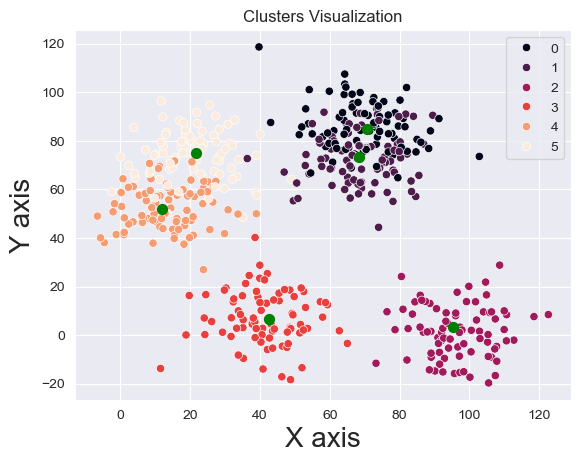

In [1]:
from mypy.memprofile import defaultdict

from mysrc.WishartClusterizationAlgorithm import Wishart
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
# import matplotlib as plt
import seaborn as sns

X, y, centers = make_blobs(n_samples=500, centers=6, n_features=2, cluster_std=10, center_box=(2, 100), shuffle=True,
                           return_centers=True, random_state=666)
X = pd.DataFrame(data=X, columns=["x", "y"])

plt.rc('axes', labelsize=20)
sns.scatterplot(data=X, x='x', y='y', hue=y, palette='rocket')
plt.scatter(centers[:, 0], centers[:, 1], s=50, c='g', marker='o')
plt.title('Clusters Visualization')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()


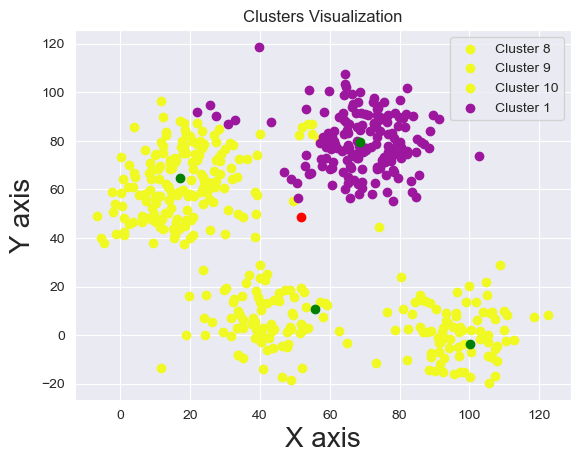

In [5]:
wishart = Wishart(k=16, mu=0.45)
wishart.fit(X)
x_list = X.values.tolist()
wishart.fit(x_list)
clusters = wishart.labels_
cluster_centers = wishart.clusters_centers_
from matplotlib import colormaps

c = list(wishart.center)
unique_clusters = set(clusters)
colors = plt.get_cmap('plasma', len(unique_clusters))
for cluster in unique_clusters:
    cluster_points = X[clusters == cluster]
    plt.scatter(cluster_points['x'], cluster_points['y'],
                color=colors(cluster), label=f'Cluster {cluster}')
    plt.scatter(cluster_centers[cluster][0], cluster_centers[cluster][1], color='green')
plt.scatter(c[0], c[1], color='red')
plt.title('Clusters Visualization')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

In [6]:
гилмар прикладная теория катастроф про ряд лоренца. алгоритм ронгикуна про численное интегрирование. книжку балашовой про численное интегрирование.

SyntaxError: invalid syntax (4236983990.py, line 1)